In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [21]:
# Convert boolean columns to integers (0 and 1)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [23]:
x = df.drop(columns=["Exited"])
y = df["Exited"].values

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain_tf = scaler.fit_transform(xtrain)
xtest_tf = scaler.transform(xtest)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(11,activation="sigmoid",input_dim=11))
model.add(Dense(11,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
history = model.fit(xtrain,ytrain,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 6ms/step - loss: 0.5033 - accuracy: 0.7958 - val_loss: 0.4993 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7958 - val_loss: 0.4992 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7958 - val_loss: 0.4988 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7958 - val_loss: 0.4985 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7958 - val_loss: 0.4986 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7958 - val_loss: 0.4983 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7958 - val_loss: 0.4978 - val_accuracy: 0.7969

In [30]:
ypred = model.predict(xtest)

63/63 [==============================] - 0s 3ms/step


In [31]:
ypred

array([[0.24490319],
       [0.24490319],
       [0.2378932 ],
       ...,
       [0.22858185],
       [0.23742546],
       [0.24490319]], dtype=float32)

In [32]:
ypred = ypred.argmax(axis=-1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7975

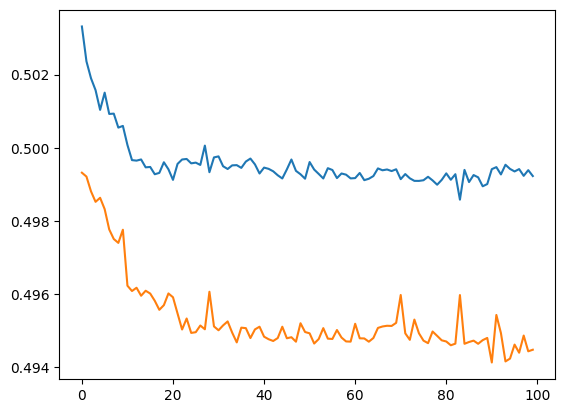

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

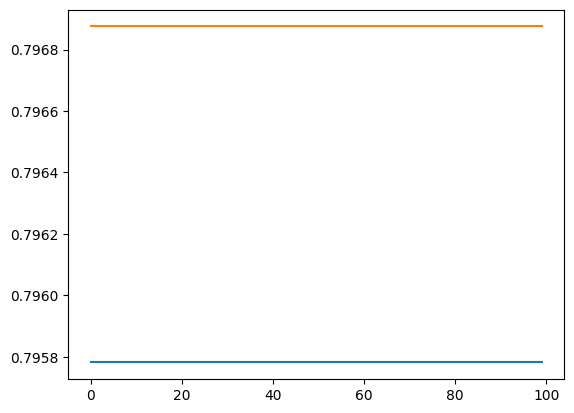

In [35]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])